<a href="https://colab.research.google.com/github/Alexandr-M-85/Neural-University/blob/main/%D0%92%D0%B0%D1%80%D0%B8%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Возьмите из ноутбука по практическому занятия "Автокодировщики" сверточный вариационный энкодер или напишите свой и обучите его на датасете Emnist letters. 

Датасет содержит изображения рукописных латинских букв. 

Размер обучающей выборки 697932 изображений, тестовой - 116323. 


Данный автокодировщик показывает весьма слабые результаты. При воспроизведении букв много "брака". Повысьте качество его работы. Обратите внимание на следущие гиперпараметры:
1. Размерность скрытого пространства
2. Количество сверточных слоев
3. Число эпох обучения

Добейтесь существенного улучшения качество воспроизведения букв. 

В выводах укажите минимальные значения подбираемых параметров, при которых удается получить желаемое качество воспроизведения символов (пример ниже).

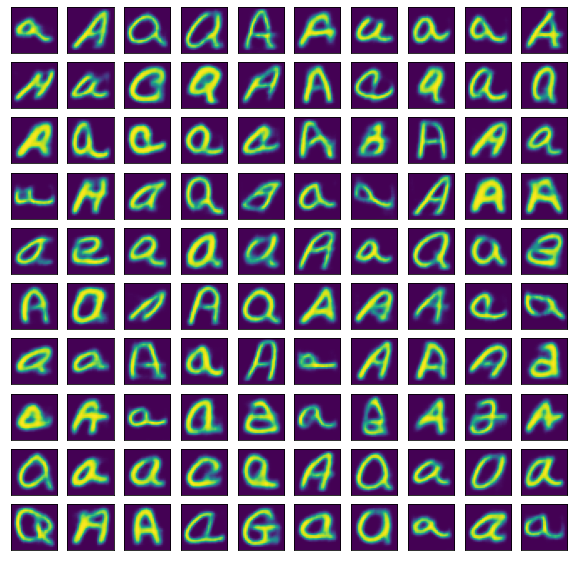

In [ ]:
!pip install emnist

In [ ]:
# Подключим Numpy
import numpy as np

# Подключим библиотеку отображения графиков
import matplotlib.pyplot as plt

# Импортируем Keras
from tensorflow import keras

import tensorflow as tf

# Подключим все необходимые слои Keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Lambda, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Dropout, concatenate, Conv2D, Conv2DTranspose

# Подключим модуль вычислений на Keras
import keras.backend as K

# Подключим датасет рукописных букв
from emnist import extract_training_samples, extract_test_samples  

# Подключим модуль работы с операционной системой
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # От tensorflow будет получать только ошибки

In [ ]:
# Скачаем обучающую выборку
xs_train, y_train = extract_training_samples('letters')

# Скачаем тестовую выборку
xs_test, y_test = extract_test_samples('letters')

# Добавим 1 размерность numpy-массиву обучающей выборки + приведем к диапазону 0...1
x_train = np.reshape(xs_train, (len(xs_train), 28, 28, 1))/255. 

# Добавим 1 размерность numpy-массиву тестовой выборки + приведем к диапазону 0...1
x_test = np.reshape(xs_test, (len(xs_test), 28, 28, 1))/255. 

In [ ]:
# Определим функцию отображения 100 картинок

def showResult(re): # Получим 100 картинок
    
    total = 10                               # Считаем полное количесво выводимых мультяшек +1
    plt.figure(figsize=(total, total))       # Создаем заготовку для финальной картинки 10x10
    num = 1                                  # Счетчик выводимых мультяшек
    for i in range(100):                     # Цикл по картинкам
        ax = plt.subplot(total, total, num)  # Добавим место для графика
        img = re[num-1:num,:,:,:]            # Сформируем очередную картинку
        num += 1                             # Инкремент номера графика        
        plt.imshow(img.squeeze())            # Рисуем пмультяшек
        ax.get_xaxis().set_visible(False)    # Спрячем ось X
        ax.get_yaxis().set_visible(False)    # Спрячем ось Y

In [ ]:
print (x_train.shape) # Выведем размерность обучающей выборки изображений
print (x_test.shape)  # Выведем размерность тестовой выборки изображений
print (y_train.shape) # Выведем размерность обучающей выборки меток
print (y_test.shape)  # Выведем размерность тестовой выборки меток

(124800, 28, 28, 1)
(20800, 28, 28, 1)
(124800,)
(20800,)


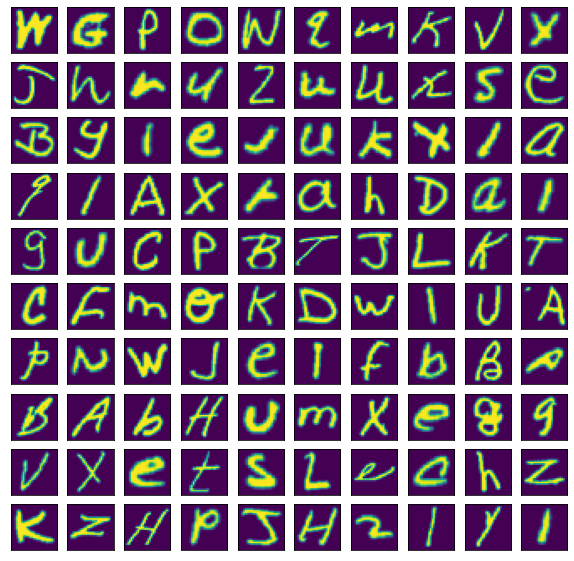

In [ ]:
# Взглянем на первые 100 изображений обучающей выборки

showResult(x_train[:100,:,:,:])

In [ ]:
# Взглянем на первые 100 меток обучающей выборки

y_train[:100]

array([23,  7, 16, 15, 23, 17, 13, 11, 22, 24, 10, 14, 18, 21, 26, 21, 21,
       24, 19,  5,  2, 25,  9,  5, 10, 21, 11, 24, 12,  1, 17,  9,  1, 24,
       18,  1,  8,  4,  1,  9,  7, 21,  3, 16,  2, 20, 10, 12, 11, 20,  3,
        6, 13, 15, 11,  4, 23, 12, 21,  1, 16, 14, 23, 10,  5, 12,  6,  2,
        2,  1,  2,  1,  2,  8, 21, 13, 24,  5,  7,  7, 22, 24,  5, 20, 19,
       12,  5,  3,  8, 26, 11, 26,  8, 16, 10,  8, 26, 12, 25,  9],
      dtype=uint8)

In [ ]:
# Ваше решение

# Создадим сверточный энкодер
input_img = Input(shape=(28, 28, 1))
x = Conv2D(64, (3,3), strides=1, padding='same')(input_img)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(128, (3,3), strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(128, (3,3), strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(128, (3,3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)
x = Dense(20, activation='linear')(x)

In [ ]:
z_mean = Dense(20)(x)
z_log_var = Dense(20)(x)

In [ ]:
# Создадим функцию - генератор случайных чисел с заданными параметрами

def noiser(args):
    z_mean, z_log_var = args
    N = K.random_normal(shape=(K.shape(z_mean)[0], 20), mean=0., stddev=1.0)
    return K.exp(z_log_var / 2) * N + z_mean                                 

# Создадим свой слой - лямбда. На входе мат.ожидание и логарифм дисперсии
# На выходе - тензор случайных чисел
h = Lambda(noiser, output_shape=(20,))([z_mean, z_log_var])

In [ ]:
# Соберем энкодер
encoder = keras.Model(input_img, [z_mean, z_log_var, h])

In [ ]:
# Создадим сверточный декодер

input_enc = Input(shape=(20,))
x = Dense(3136)(input_enc)
x = LeakyReLU()(x)
x = Reshape((7, 7, 64))(x)

x = Conv2DTranspose(128, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2DTranspose(128, (3,3), padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2DTranspose(128, (3,3), padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

decoded = Conv2DTranspose(1, (3,3), padding='same', activation='sigmoid')(x)

In [ ]:
# Соберем декодер
decoder = keras.Model(input_enc, decoded)

In [ ]:
# Соберем сетку
avtoencoder = keras.Model(input_img, decoder(encoder(input_img)[2]))

In [ ]:
# Рассчитаем ошибку восстановления изображения - MSE
reconstruction_loss = keras.losses.MSE(input_img, decoder(encoder(input_img)[2]))
# Уберем нормировку
reconstruction_loss *= 28*28
# Рассчитаем ошибки KL
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = -0.5* K.sum(kl_loss, axis=-1)
# Суммируем ошибки - здесь можно вводить веса  
vaeс_loss = K.mean(reconstruction_loss) +  K.mean(kl_loss)
# Добавляем в модель
avtoencoder.add_loss(vaeс_loss)

In [ ]:
# Компилируем модель
avtoencoder.compile(optimizer='adam')

# Обучаем модель
avtoencoder.fit(x_train, x_train, epochs=10, batch_size=100, shuffle=True)

Epoch 1/10
1248/1248 [==============================] - 50s 34ms/step - loss: 49.0073
Epoch 2/10
1248/1248 [==============================] - 40s 32ms/step - loss: 38.0815
Epoch 3/10
1248/1248 [==============================] - 40s 32ms/step - loss: 36.6110
Epoch 4/10
1248/1248 [==============================] - 40s 32ms/step - loss: 35.7252
Epoch 5/10
1248/1248 [==============================] - 40s 32ms/step - loss: 35.1704
Epoch 6/10
1248/1248 [==============================] - 40s 32ms/step - loss: 34.7497
Epoch 7/10
1248/1248 [==============================] - 40s 32ms/step - loss: 34.4358
Epoch 8/10
1248/1248 [==============================] - 40s 32ms/step - loss: 34.2128
Epoch 9/10
1248/1248 [==============================] - 40s 32ms/step - loss: 33.9809
Epoch 10/10
1248/1248 [==============================] - 40s 32ms/step - loss: 33.8054


In [ ]:
# функция для вывода изображений
def plotImages(xTrain, pred, shape=(28, 28)):
    # зададим количество картинок, сколько хотим показать
    n = 20
    plt.figure(figsize=(30, 5))
    for i in range(n):
        index = np.random.randint(0, pred.shape[0])
        # Показываем картинки из тестового набора
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(xTrain[index].reshape(shape))
        plt.gray()
        # скрываем выводы координатных осей
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Показываем восстановленные картинки
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(pred[index].reshape(shape))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

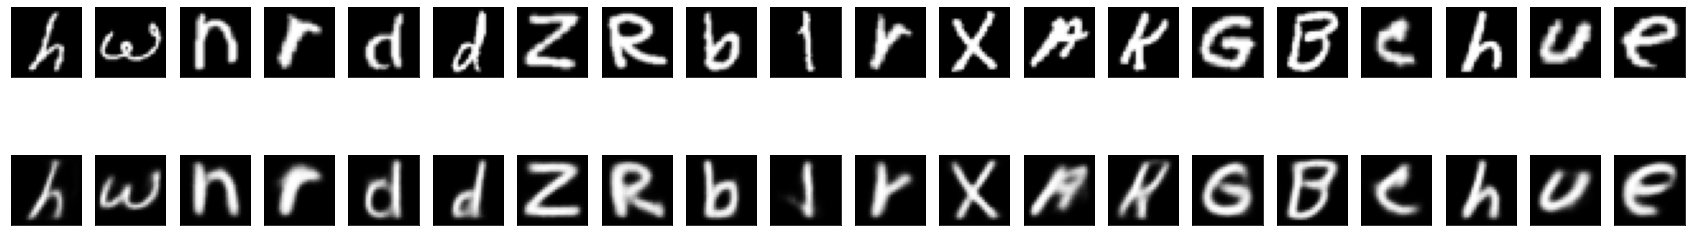

In [ ]:
predict = avtoencoder.predict(x_test)
plotImages(x_test, predict, shape=(28,28))

Вывод: более качественные изображения букв получились при увеличении размерность скрытого пространства до 20 и увеличения количества сверточных слоев в 2 раза.